# 1. 데이터 가져오기

* sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
* diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df_x = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_y = diabetes.target
df_x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


# 2. 모델에 입력할 데이터 X 준비하기

* `df_X`에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [2]:
import numpy as np

df_x = np.array(df_x)
df_x.shape

(442, 10)

# 3. 모델에 예측할 데이터 y 준비하기

* `df_y`에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [3]:
df_y = np.array(df_y)
df_y.shape

(442,)

# 4. train 데이터와 test 데이터로 분리하기

* `X`와 `y` 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


# 5. 모델 준비하기

* 입력 데이터 개수에 맞는 가중치 `W`와 `b`를 준비해주세요.
* 모델 함수를 구현해주세요.

In [20]:
W = np.random.rand(10) 
W

array([0.28265854, 0.73105244, 0.00219743, 0.56216329, 0.778585  ,
       0.20008916, 0.40414281, 0.66662695, 0.70048218, 0.62742823])

In [21]:
b = np.random.rand()
b

0.6021631669712119

In [7]:
def model(x, W, b):
    predictions = 0
    for i in range(10):
        predictions += x[:, i] * W[i]
    predictions += b
    return predictions

# 6. 손실함수 loss 정의하기

* 손실함수를 MSE 함수로 정의해주세요.

In [8]:
def MSE(a, b):
    return ((a - b) ** 2).mean() 

In [9]:
def loss(x, W, b, y):
    predictions = model(x, W, b)
    L = MSE(predictions, y)
    return L

# 7. 기울기를 구하는 gradient 함수 구현하기

* 기울기를 계산하는 `gradient` 함수를 구현해주세요.

In [10]:
def gradient(x, W, b, y):
    
    y_pred = model(x, W, b)
    
    dw = 1/len(W) * 2 * x.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    
    return dw, db

In [11]:
dw, db = gradient(df_x, W, b, df_y)
print(f'dw : {dw}')
print(f'db: {db}')

dw : [ -60.62975245  -13.78703085 -189.69602931 -142.72399118  -68.34663282
  -56.09747871  127.76854817 -139.15089456 -182.95760661 -123.61876636]
db: -303.3620026316274


# 8. 하이퍼 파라미터인 학습률 설정하기

* 학습률, learning rate 를 설정해주세요
* 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [22]:
LEARNING_RATE = 0.001

# 9. 모델 학습하기

* 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
* loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
* 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [23]:
losses = []

for i in range(1, 30001):
    dw, db = gradient(X_train, W, b, y_train)   
    W -= LEARNING_RATE * dw         
    b -= LEARNING_RATE * db         
    L = loss(df_x, W, b, df_y)            
    losses.append(L)                
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 4562.4079
Iteration 2000 : Loss 3591.0691
Iteration 3000 : Loss 3324.4396
Iteration 4000 : Loss 3182.6284
Iteration 5000 : Loss 3094.7430
Iteration 6000 : Loss 3036.1907
Iteration 7000 : Loss 2995.7821
Iteration 8000 : Loss 2967.4017
Iteration 9000 : Loss 2947.2698
Iteration 10000 : Loss 2932.8900
Iteration 11000 : Loss 2922.5597
Iteration 12000 : Loss 2915.0991
Iteration 13000 : Loss 2909.6834
Iteration 14000 : Loss 2905.7322
Iteration 15000 : Loss 2902.8349
Iteration 16000 : Loss 2900.7000
Iteration 17000 : Loss 2899.1190
Iteration 18000 : Loss 2897.9424
Iteration 19000 : Loss 2897.0624
Iteration 20000 : Loss 2896.4009
Iteration 21000 : Loss 2895.9008
Iteration 22000 : Loss 2895.5204
Iteration 23000 : Loss 2895.2292
Iteration 24000 : Loss 2895.0043
Iteration 25000 : Loss 2894.8288
Iteration 26000 : Loss 2894.6903
Iteration 27000 : Loss 2894.5793
Iteration 28000 : Loss 2894.4885
Iteration 29000 : Loss 2894.4128
Iteration 30000 : Loss 2894.3481


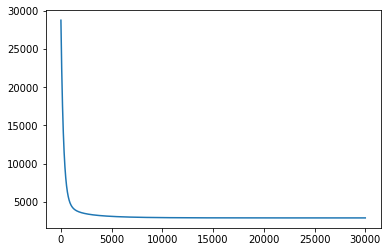

In [24]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

# 10. test 데이터에 대한 성능 확인하기

* test 데이터에 대한 성능을 확인해주세요.

In [25]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2881.0345539777

# 11. 정답 데이터와 예측한 데이터 시각화하기

* x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

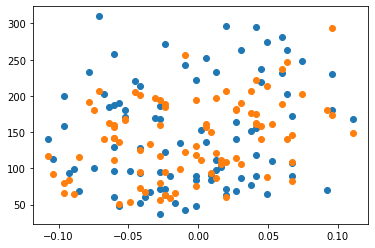

In [26]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()